<a href="https://colab.research.google.com/github/salnuraqidah/machine-learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
df[~df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Visualization**

In [121]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

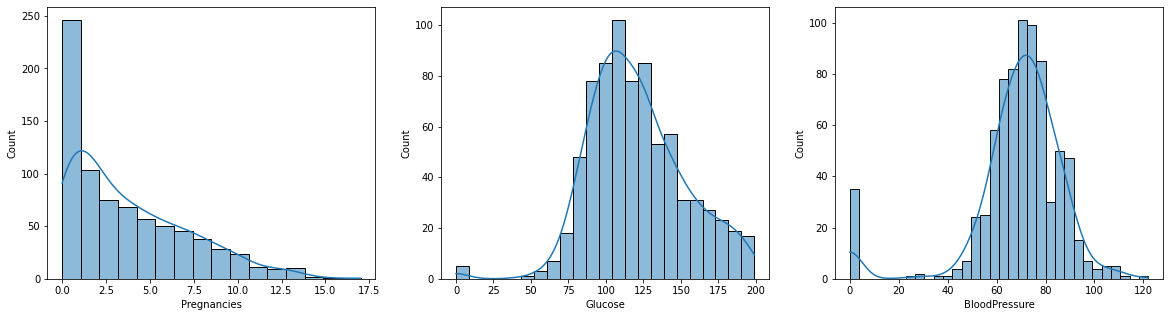

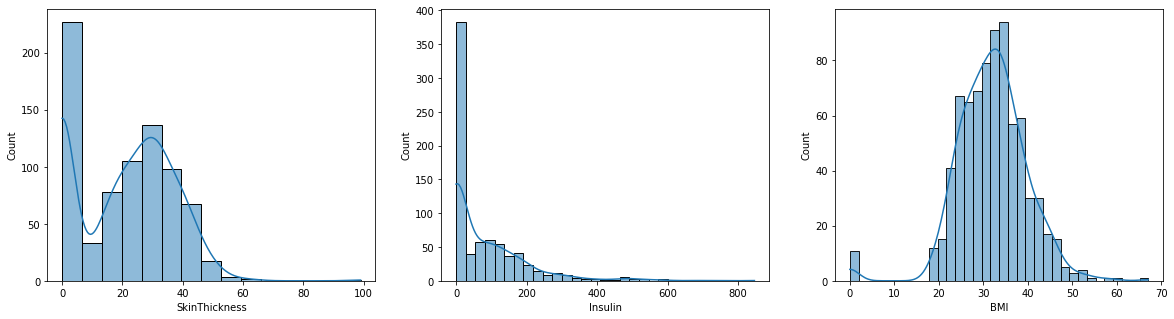

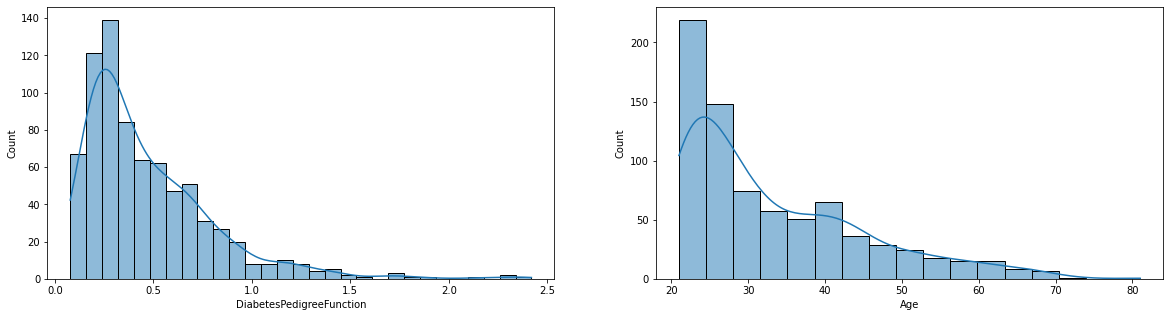

In [122]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(df['Pregnancies'], ax=ax[0], kde=True)
sns.histplot(df['Glucose'], ax=ax[1], kde=True)
sns.histplot(df['BloodPressure'], ax=ax[2], kde=True)

fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(df['SkinThickness'], ax=ax[0], kde=True)
sns.histplot(df['Insulin'], ax=ax[1], kde=True)
sns.histplot(df['BMI'], ax=ax[2], kde=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.histplot(df['DiabetesPedigreeFunction'], ax=ax[0], kde=True)
sns.histplot(df['Age'], ax=ax[1], kde=True)
plt.show()

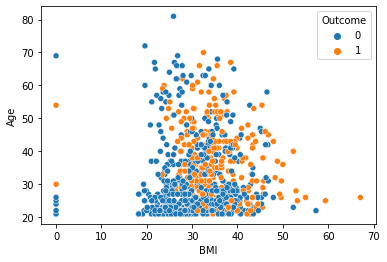

In [123]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome',data=df)
plt.show()

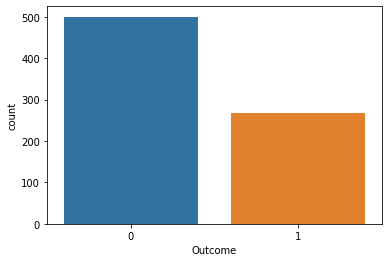

In [124]:
sns.countplot(x='Outcome', data=df)
plt.show()

In [125]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [126]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Train - Test Split**

In [127]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [130]:
y_train.value_counts()

0    405
1    209
Name: Outcome, dtype: int64

In [131]:
y_test.value_counts()

0    95
1    59
Name: Outcome, dtype: int64

Balancing Data \
bertujuan agar model tidak cendrung ke nol

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
sm = SMOTE()

In [134]:
X_res, y_res = sm.fit_resample(X_train, y_train)

In [135]:
y_res.value_counts()

1    405
0    405
Name: Outcome, dtype: int64

**Data Preprocessing**

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
scaler = MinMaxScaler()
scaler.fit(X_res)
X_res_train = scaler.transform(X_res)
X_test = scaler.transform(x_test) 

In [138]:
(X_res_train,X_test)

(array([[0.        , 0.81407035, 0.62295082, ..., 0.7928465 , 0.29077711,
         0.06666667],
        [0.11764706, 0.43718593, 0.        , ..., 0.43070045, 0.29675491,
         0.06666667],
        [0.        , 0.68844221, 0.55737705, ..., 0.36959762, 0.02775406,
         0.        ],
        ...,
        [0.41176471, 0.60301508, 0.60655738, ..., 0.59335008, 0.28816672,
         0.33333333],
        [0.        , 0.91457286, 0.77868852, ..., 0.59930944, 0.21710598,
         0.15      ],
        [0.11764706, 0.74371859, 0.58196721, ..., 0.39568186, 0.12885164,
         0.1       ]]),
 array([[0.23529412, 0.77386935, 0.59016393, ..., 0.46646796, 0.11101623,
         0.26666667],
        [0.11764706, 0.56281407, 0.70491803, ..., 0.57228018, 0.07173356,
         0.11666667],
        [0.05882353, 0.67839196, 0.44262295, ..., 0.39791356, 0.26003416,
         0.68333333],
        ...,
        [0.47058824, 0.42713568, 0.45081967, ..., 0.36363636, 0.02476516,
         0.35      ],
        [0.2

**Modelling**

In [139]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, LSTM 

In [140]:
model = Sequential()
model.add(Dense(15, input_dim=8,activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, input_dim=8,activation='softmax')) # output layer, actv softmex karena klasifikasi 

In [141]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                135       
                                                                 
 dense_13 (Dense)            (None, 40)                640       
                                                                 
 dense_14 (Dense)            (None, 2)                 82        
                                                                 
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________


dense = 8+1 * 15 = 135 \
dense_1 = 15+1 * 40 = 640 \
dense_2 = 40+1 * 2 = 82

In [142]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [143]:
from keras.callbacks import ModelCheckpoint
import os

In [144]:
checkpoint_path = '/content/drive/MyDrive/datasets/Hasil Epoch/cp-{epoch:04d}.hdf5'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(
    checkpoint_path, verbose=1, save_best_only=True, save_freq = 'epoch'
)

In [145]:
history = model.fit(X_res_train, y_res, validation_split=0.12, epochs=50, batch_size=16, verbose=1, callbacks=[cp_callback])

Epoch 1/50
29/45 [==================>...........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5129 
Epoch 1: val_loss improved from inf to 0.78332, saving model to /content/drive/MyDrive/datasets/Hasil Epoch/cp-0001.hdf5
45/45 [==============================] - 1s 11ms/step - loss: 0.6876 - accuracy: 0.5309 - val_loss: 0.7833 - val_accuracy: 0.0000e+00
Epoch 2/50
22/45 [=============>................] - ETA: 0s - loss: 0.6790 - accuracy: 0.5511
Epoch 2: val_loss did not improve from 0.78332
45/45 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5787 - val_loss: 0.7880 - val_accuracy: 0.0102
Epoch 3/50
27/45 [=================>............] - ETA: 0s - loss: 0.6618 - accuracy: 0.5972
Epoch 3: val_loss improved from 0.78332 to 0.70796, saving model to /content/drive/MyDrive/datasets/Hasil Epoch/cp-0003.hdf5
45/45 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.6180 - val_loss: 0.7080 - val_accuracy: 0.5510
Epoch 4/50
26/45 [==============

Note : Jika selisih accuracy train dan accuracy val besar maka bisa dikatakan modelnya overfitting

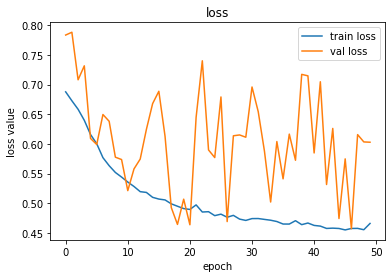

In [146]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.legend()
plt.show()

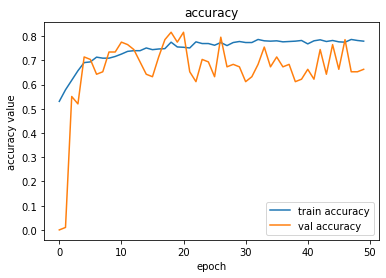

In [147]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy value')
plt.legend()
plt.show()

In [148]:
loss, acc = model.evaluate(X_test, y_test)
print(f"loss: {loss}")
print(f"acc: {acc}")

5/5 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7727
loss: 0.4974096715450287
acc: 0.7727272510528564


In [150]:
loss, acc = model.evaluate(X_res_train, y_res)
print(f"loss: {loss}")
print(f"acc: {acc}")

26/26 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7852
loss: 0.462944358587265
acc: 0.7851851582527161


**Load Model**

In [149]:
models = model
models.load_weights('/content/drive/MyDrive/datasets/Hasil Epoch/cp-0047.hdf5') # diambil iterasi ke 47 karena memiliki akurasi yang baik

In [152]:
models.get_weights()

[array([[-0.32780007,  0.25131938, -0.30268112, -0.2773064 ,  0.05553171,
          0.32346132,  0.18620645,  0.23810269,  0.04779488,  0.2656843 ,
         -0.00537069, -0.32756802, -0.52663636, -0.4269756 , -0.05691119],
        [ 0.2962795 , -0.12378239, -0.4323768 , -0.04021424, -0.32143673,
         -0.10954291,  0.21796729, -0.11320454,  0.48689213,  0.3673045 ,
         -0.2022357 , -0.29606542, -0.28593352,  0.5363319 , -0.4364403 ],
        [-0.3644232 ,  0.08776625, -0.13267496,  0.2889675 ,  0.3549007 ,
          0.3030877 ,  0.41225916,  0.25549623,  0.36706793,  0.00186522,
          0.387121  , -0.06614137,  0.27962613,  0.2655104 ,  0.2142216 ],
        [ 0.35006922,  0.05366245, -0.12695578, -0.55419797, -0.01209373,
         -0.18626611,  0.37627226, -0.46203306, -0.33470568,  0.10250176,
         -0.0798234 , -0.23321411,  0.16546528, -0.43066034,  0.30471367],
        [ 0.37796617,  0.54170495,  0.01149464,  0.28666997, -0.02327148,
          0.4817156 , -0.02905162,

**transfer learning**

In [153]:
checkpoint_path = '/content/drive/MyDrive/datasets/Hasil Epoch/cp2-{epoch:04d}.hdf5'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(
    checkpoint_path, verbose=1, save_best_only=True, save_freq = 'epoch'
)

In [154]:
history = models.fit(X_res_train, y_res, validation_split=0.12, epochs=50, batch_size=16, verbose=1, callbacks=[cp_callback])

Epoch 1/50
28/45 [=================>............] - ETA: 0s - loss: 0.4646 - accuracy: 0.7835
Epoch 1: val_loss improved from inf to 0.54055, saving model to /content/drive/MyDrive/datasets/Hasil Epoch/cp2-0001.hdf5
45/45 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.7753 - val_loss: 0.5405 - val_accuracy: 0.7245
Epoch 2/50
27/45 [=================>............] - ETA: 0s - loss: 0.4610 - accuracy: 0.7778
Epoch 2: val_loss did not improve from 0.54055
45/45 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.7837 - val_loss: 0.6415 - val_accuracy: 0.6531
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.4565 - accuracy: 0.7781
Epoch 3: val_loss did not improve from 0.54055
45/45 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.7781 - val_loss: 0.5686 - val_accuracy: 0.6735
Epoch 4/50
28/45 [=================>............] - ETA: 0s - loss: 0.4904 - accuracy: 0.7790
Epoch 4: val_loss did

In [157]:
loss, acc = models.evaluate(X_res_train, y_res)
print(f"loss: {loss}")
print(f"acc: {acc}")

26/26 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.7852
loss: 0.4481900930404663
acc: 0.7851851582527161


In [158]:
loss, acc = models.evaluate(X_test, y_test)
print(f"loss: {loss}")
print(f"acc: {acc}")

5/5 [==============================] - 0s 9ms/step - loss: 0.4975 - accuracy: 0.7597
loss: 0.49752718210220337
acc: 0.7597402334213257
